In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import string

## CTF


### CTF-1 (Cryptanalysis)


We got the alphabitic map after many tries to map the characters based on the frequencies of the english letters.
We used a histogram to the most two repeated together (like he) then started to observe the mapping.

In [8]:
def generate_histogram(text):
    histogram = {}
    total_chars = 0
    for char in text:
        if char.isalpha():
            total_chars += 1
            if char.lower() in histogram:
                histogram[char.lower()] += 1
            else:
                histogram[char.lower()] = 1
    # Normalize histogram
    normalized_histogram = {char: count /
                            total_chars for char, count in histogram.items()}
    return normalized_histogram

In [9]:
def build_char_combinations_histogram(encrypted_text):
    histogram = {}
    total_pairs = 0
    for i in range(len(encrypted_text) - 1):
        pair = encrypted_text[i:i+2]
        if len(pair) == 2 and pair.isalpha():
            total_pairs += 1
            if pair in histogram:
                histogram[pair] += 1
            else:
                histogram[pair] = 1
    sorted_histogram = sorted(
        histogram.items(), key=lambda x: x[1], reverse=True)

    return sorted_histogram

In [10]:
def decrypt_affine_caesar_cipher(encrypted_text, b):
    decrypted_text = ''
    a_inv = 17  # Modular inverse of 'a' modulo 26

    for char in encrypted_text:
        if char.isalpha():
            decrypted_text += chr((((ord(char) - ord('A') - b)) %
                                  26) + ord('A'))
        else:
            decrypted_text += char
    return decrypted_text


def try_all_shifts(encrypted_text):
    decrypted_text = decrypt_affine_caesar_cipher(encrypted_text, 4)
    print(f"Shift {20}: {decrypted_text}")
    print("----------------------------------------------------")
    return decrypted_text

ALICE WAS BEGINNING TO GET VERY TIRED OF SITTING BY HER SISTER ON THE
BANK AND OF HAVING NOTHING TO DO ONCE OR TWICE SHE HAD PEEPED INTO THE
BOOK HER SISTER WAS READING BUT IT HAD NO PICTURES OR CONVERSATIONS IN
IT AND WHAT IS THE USE OF A BOOK THOUGHT ALICE WITHOUT PICTURES OR
CONVERSATIONS

SO SHE WAS CONSIDERING IN HER OWN MIND AS WELL AS SHE COULD FOR THE
DAY MADE HER FEEL VERY SLEEPY AND STUPID WHETHER THE PLEASURE OF
MAKING A DAISYCHAIN WOULD BE WORTH THE TROUBLE OF GETTING UP AND
PICKING THE DAISIES WHEN SUDDENLY A WHITE RABBIT WITH PINK EYES RAN
CLOSE BY HERh

THERE WAS NOTHING SO VERY REMARKABLE IN THAT NOR DID ALICE THINK IT SO
VERY MUCH OUT OF THE WAY TO HEAR THE RABBIT SAY TO ITSELF OH DEAR OH
DEAR I SHALL BE TOO LATE BUT WHEN THE RABBIT ACTUALLY TOOK A WATCH
OUT OF ITS WAISTCOATPOCKET AND LOOKED AT IT AND THEN HURRIED ON ALICE
STARTED TO HER FEET FOR IT FLASHED ACROSS HER MIND THAT SHE HAD NEVER
BEFORE SEEN A RABBIT WITH EITHER A WAISTCOATPOCKET OR A WATCH TO TAKE
OUT OF I

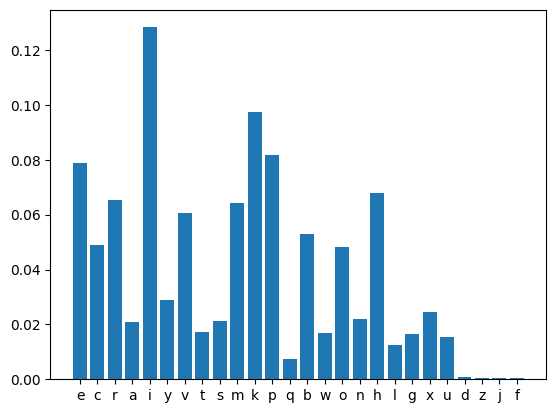

In [11]:
file_path = './CTF-1 (Cryptanalysis) done/encrypted_text.txt'

with open(file_path, 'r') as file:
    encrypted_text = file.read()
    histogram = generate_histogram(encrypted_text)
    x = build_char_combinations_histogram(encrypted_text)
    plt.bar(histogram.keys(), histogram.values())

    decrypted_text = map_characters(encrypted_text)
    print("Decrypted text:", decrypted_text)

    # # Annotate each bar with its value
    # for char, freq in histogram.items():
    #         plt.text(char, freq, str('{:.3f}'.format(freq)+char+str(ord(char)-ord('a'))), ha='center', va='bottom')

    # plt.xlabel("Characters")
    # plt.ylabel("Frequency")
    # plt.show()
    # d =  try_all_shifts(encrypted_text)
    # histogram2 = generate_histogram(d)

    # # Plot histogram
    # plt.bar(histogram2.keys(), histogram2.values())
    # plt.xlabel("Characters")
    # plt.ylabel("Frequency")
    # plt.show()

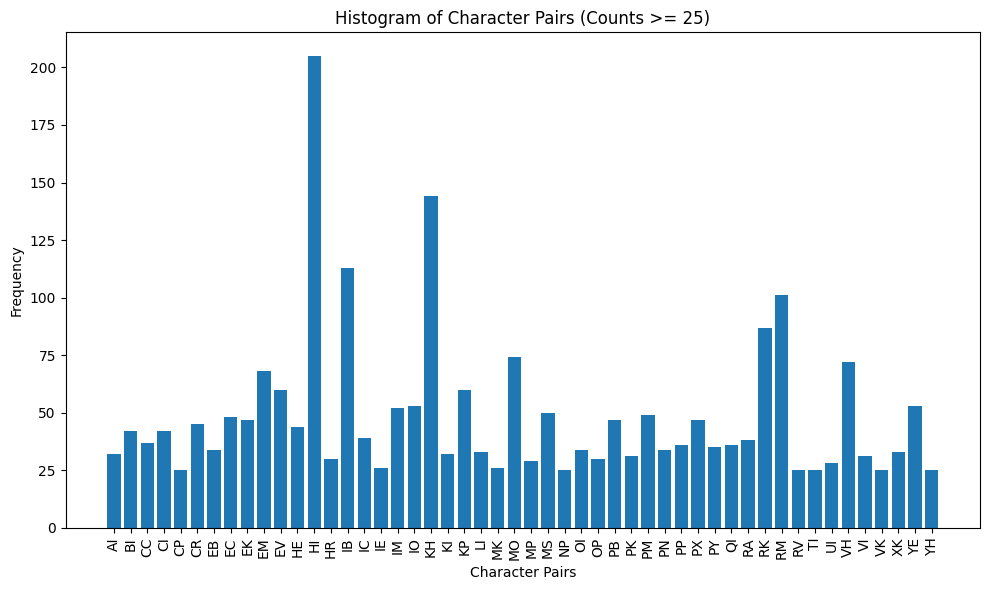

In [12]:

data = [('AB', 5), ('AC', 3), ('AE', 9), ('AH', 18), ('AI', 32), ('AK', 4), ('AL', 10), ('AP', 22), ('AR', 1), ('AX', 7), ('BB', 4), ('BE', 18), ('BG', 2), ('BH', 1), ('BI', 42), ('BK', 8), ('BL', 10), ('BM', 5), ('BO', 9), ('BP', 19), ('BR', 17), ('BS', 7), ('BU', 1), ('BV', 21), ('BW', 22), ('BX', 1), ('BY', 1), ('CC', 37), ('CE', 20), ('CI', 42), ('CK', 2), ('CL', 3), ('CN', 11), ('CO', 17), ('CP', 25), ('CQ', 2), ('CR', 45), ('CU', 1), ('CV', 1), ('CW', 21), ('DE', 2), ('DX', 3), ('EA', 8), ('EB', 34), ('EC', 48), ('EG', 7), ('EH', 3), ('EK', 47), ('EL', 7), ('EM', 68), ('EN', 3), ('EO', 21), ('EQ', 5), ('ER', 20), ('ES', 6), ('ET', 20), ('EU', 6), ('EV', 60), ('EW', 12), ('EX', 3), ('EY', 4), ('FX', 2), ('GB', 2), ('GC', 6), ('GE', 6), ('GG', 7), ('GI', 17), ('GK', 1), ('GP', 14), ('GR', 9), ('GT', 2), ('GV', 2), ('GW', 1), ('GX', 1), ('HB', 3), ('HC', 1), ('HE', 44), ('HI', 205), ('HK', 11), ('HP', 21), ('HR', 30), ('HX', 9), ('IA', 3), ('IB', 113), ('IC', 39), ('IE', 26), ('IG', 5), ('IH', 2), ('II', 20), ('IK', 15), ('IM', 52), ('IN', 5), ('IO', 53), ('IP', 1), ('IQ', 10), ('IR', 4), ('IS', 5), ('IU', 7), ('IV', 24), ('IW', 13), ('IY', 1), ('JI', 1), ('JR', 1), ('KA', 4), ('KB', 7), ('KC', 13), ('KE', 15), ('KG', 2), ('KH', 144), ('KI', 32), ('KK', 23), ('KP', 60), ('KR', 24), ('KU', 1), ('KV', 5), ('KW', 3), ('KX', 10), ('KY', 1), ('LE', 1), ('LI', 33), ('LM', 2), ('LR', 3), ('LV', 3), ('MA', 4), ('MC', 9), ('ME', 4), ('MI', 24), ('MJ', 1), ('MK', 26), ('ML', 8), ('MM', 2), ('MO', 74), ('MP', 29), ('MQ', 2), ('MR', 6), ('MS', 50), ('MV', 5), ('MW', 5), ('MX', 1), ('NB', 3), ('NC', 3), ('NE', 4), ('NI', 8), ('NK', 4), ('NN', 5), ('NP', 25), ('NR', 13), ('NW', 1), ('NX', 2), ('OB', 4), ('OC', 2), ('OE', 6), ('OI', 34), ('OO', 6), ('OP', 30), ('OQ', 2), ('OR', 12), ('OS', 1), ('OV', 5), ('PA', 5), ('PB', 47), ('PC', 11), ('PE', 6), ('PG', 13), ('PH', 4), ('PJ', 1), ('PK', 31), ('PL', 12), ('PM', 49), ('PN', 34), ('PO', 1), ('PP', 36), ('PQ', 4), ('PR', 6), ('PU', 13), ('PV', 10), ('PX', 47), ('PY', 35), ('PZ', 1), ('QI', 36), ('QP', 1), ('QR', 3), ('RA', 38), ('RB', 5), ('RC', 7), ('RG', 2), ('RI', 9), ('RJ', 1), ('RK', 87), ('RL', 7), ('RM', 101), ('RN', 7), ('RO', 17), ('RP', 5), ('RS', 11), ('RT', 1), ('RU', 8), ('RV', 25), ('RZ', 2), ('SB', 6), ('SC', 3), ('SE', 7), ('SH', 17), ('SI', 21), ('SP', 9), ('SR', 3), ('SV', 2), ('TB', 3), ('TC', 8), ('TE', 3), ('TI', 25), ('TP', 15), ('TR', 10), ('TT', 8), ('TW', 3), ('TX', 15), ('UE', 20), ('UG', 5), ('UI', 28), ('UP', 7), ('UR', 10), ('UT', 2), ('UW', 2), ('UX', 4), ('VA', 4), ('VC', 4), ('VE', 22), ('VH', 72), ('VI', 31), ('VK', 25), ('VL', 1), ('VP', 23), ('VR', 12), ('VU', 4), ('VV', 11), ('VW', 1), ('VX', 7), ('WA', 1), ('WC', 1), ('WI', 3), ('WK', 2), ('WP', 5), ('WR', 5), ('XA', 4), ('XB', 17), ('XC', 13), ('XE', 1), ('XG', 17), ('XK', 33), ('XM', 16), ('XO', 5), ('XR', 2), ('XS', 6), ('XT', 1), ('XU', 3), ('XV', 8), ('YC', 1), ('YE', 53), ('YH', 25), ('YI', 21), ('YM', 17), ('YP', 8), ('YR', 14), ('ZI', 2), ('ZR', 1)]

# Filter out pairs with counts lower than 25
filtered_data = [(pair, count) for pair, count in data if count >= 25]

# Extracting pairs and counts from filtered data
pairs = [pair[0] for pair in filtered_data]
counts = [pair[1] for pair in filtered_data]

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.bar(pairs, counts)
plt.xlabel('Character Pairs')
plt.ylabel('Frequency')
plt.title('Histogram of Character Pairs (Counts >= 25)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [13]:
def map_characters(text):
    mapping = {
        'H': 'H',
        'I': 'E',
        'K': 'T',
        'P': 'O',
        'O': 'D',
        'E': 'A',
        'V': 'S',
        'M': 'N',
        'S': 'G',
        'R': 'I',
        'B': 'R',
        'C': 'L',
        'A': 'C',
        'Y': 'W',
        'X': 'U',
        'T': 'B',
        'W': 'Y',
        'Q': 'V',
        'L': 'K',
        'G': 'P',
        'U': 'M',
        'N': 'F',
        'D': 'J',
        'J': 'X',
        'Z': 'Z',
        'F': 'Q'

    }
    decrypted_text = ''
    for char in text:
        if char in mapping:
            decrypted_text += mapping[char]
        else:
            decrypted_text += char
    print(decrypted_text)
    return decrypted_text

### CTF-2 (Packet Analysis)

In [15]:
def caesar_cipher_decrypt(text, shift):
    decrypted_text = ''
    for char in text:
        if char.isalpha():
            shifted_char = chr(((ord(char) - shift - 65) % 26) +
                               65) if char.isupper() else chr(((ord(char) - shift - 97) % 26) + 97)
            decrypted_text += shifted_char
        else:
            decrypted_text += char
    return decrypted_text


# Example usage:
encrypted_text = "Gur synt vf cvpbPGS{c33xno00_1_f33_h_qrnqorrs}"
for i in range(0, 26):
    decrypted_text = caesar_cipher_decrypt(encrypted_text, i)
    print("Decrypted text:", decrypted_text)

Decrypted text: Gur synt vf cvpbPGS{c33xno00_1_f33_h_qrnqorrs}
Decrypted text: Ftq rxms ue buoaOFR{b33wmn00_1_e33_g_pqmpnqqr}
Decrypted text: Esp qwlr td atnzNEQ{a33vlm00_1_d33_f_oplomppq}
Decrypted text: Dro pvkq sc zsmyMDP{z33ukl00_1_c33_e_noknloop}
Decrypted text: Cqn oujp rb yrlxLCO{y33tjk00_1_b33_d_mnjmknno}
Decrypted text: Bpm ntio qa xqkwKBN{x33sij00_1_a33_c_lmiljmmn}
Decrypted text: Aol mshn pz wpjvJAM{w33rhi00_1_z33_b_klhkillm}
Decrypted text: Znk lrgm oy voiuIZL{v33qgh00_1_y33_a_jkgjhkkl}
Decrypted text: Ymj kqfl nx unhtHYK{u33pfg00_1_x33_z_ijfigjjk}
Decrypted text: Xli jpek mw tmgsGXJ{t33oef00_1_w33_y_hiehfiij}
Decrypted text: Wkh iodj lv slfrFWI{s33nde00_1_v33_x_ghdgehhi}
Decrypted text: Vjg hnci ku rkeqEVH{r33mcd00_1_u33_w_fgcfdggh}
Decrypted text: Uif gmbh jt qjdpDUG{q33lbc00_1_t33_v_efbecffg}
Decrypted text: The flag is picoCTF{p33kab00_1_s33_u_deadbeef}
Decrypted text: Sgd ekzf hr ohbnBSE{o33jza00_1_r33_t_cdzcadde}
Decrypted text: Rfc djye gq ngamARD{n33iyz00_1_q33_s_bc

#### Decrypted text: The flag is picoCTF{p33kab00_1_s33_u_deadbeef}

* using https://apackets.com/pcaps/flows 

* and looked thorw all the http request found  Gur synt vf cvpbPGS{c33xno00_1_f33_h_qrnqorrs}

* in 192.168.38.104:64093  🇺🇸 18.222.37.134:80 (GET)

* tried caser cipher and it works

### CTF-3 (Image Manipulation)

We used photoshop to merge the two photos and see some noisy text but we noticed CTF in the text, then we tried to xor the two images but still the text was not clear, then the summation made it very clear.

* picoCTF(a72ea4af)

In [18]:

# Read the images
foo = cv2.imread("./CTF-3 (Image Manipulation) done/data/first.png")
bar = cv2.imread("./CTF-3 (Image Manipulation) done/data/second.png")

result = foo + bar
cv2.imwrite("./output.png", result)

True

### CTF-4 (Bit Shifting)

* fastctf{a_bit_tricky}

In [19]:
# Read the contents of the "bits.txt" file as bits
with open("./CTF-4 (Bit Shifting) done/bits.txt", "rb") as file:
    # Read the file byte by byte and concatenate the bits into a single string
    bit_stream = ""
    byte = file.read(1)
    while byte:
        # Convert the byte to its binary representation
        bits = bin(int.from_bytes(byte, "big"))[2:].zfill(8)
        # Concatenate the binary representation to the bit stream
        bit_stream += bits
        # Read the next byte
        byte = file.read(1)

# Print the bit stream
print("Bit stream:", bit_stream)

Bit stream: 0010010000110010101101100011011000110111100100000011000010110111001100100001000000111011101100101011011000110001101101111011011010110010100100000011101000110111100100000011001100110100101101100011001010011000100110001001000000110011001101111011100100110010101101110011100110110100101100011001000000110001101101000011000010110110001101100011001010110111001100111011001010010111000100000010101000110100001101001011100110010000001101001011100110010000001101010011101010111001101110100001000000110011001101001011011000110110001100101011100100010000001110100011001010111100001110100001000000111010001101111001000000110110101100001011010110110010100100000011010010111010000100000011011000110111101101110011001110110010101110010001011100000110100001010000011010000101001100110011000010111001101110100011000110111010001100110011110110110000101011111011000100110100101110100010111110111010001110010011010010110001101101011011110010111110


In [20]:
# Try shifting the bit stream by 1 bit left and convert it to characters
for i in range(len(bit_stream)):
    # Shift the bit stream by 1 bit left
    shifted_bit_stream = bit_stream[i:] + bit_stream[:i]
    # Convert the shifted bit stream to characters
    shifted_characters = ""
    for j in range(0, len(shifted_bit_stream), 8):
        byte = shifted_bit_stream[j:j+8]
        shifted_characters += chr(int(byte, 2))
    # Print the shifted characters
    print("Shifted characters:", shifted_characters)

Shifted characters: $2¶670·2;²¶1·¶²:734¶237¹2·9´±1´0¶62·3²*44¹4¹5:¹º34¶62¹:2¼::76°µ²4º67·3²¹30¹º1º3=°¯±4º/º94±µ¼¾
Shifted characters: Hello and welcome to file11 forensic challenge. This is just filler text to make it longer.

fastctf{a_bit_tricky|
Shifted characters: ÊØØÞ@ÂÜÈ@îÊØÆÞÚÊ@èÞ@ÌÒØÊbb@ÌÞäÊÜæÒÆ@ÆÐÂØØÊÜÎÊ\@¨ÐÒæ@Òæ@Ôêæè@ÌÒØØÊä@èÊðè@èÞ@ÚÂÖÊ@Òè@ØÞÜÎÊä\ÌÂæèÆèÌöÂ¾ÄÒè¾èäÒÆÖòø
Shifted characters: !±±¼¹Ý±½µÑ¼¥±ÄÄ½É¹Í¥¡±±¹¸Q¡¥Ì¥Ì©ÕÍÐ¥±±ÈÑáÐÑ¼µ­¥Ð±½¹È¸4(4)ÍÑÑí}¥Ñ}ÑÉ¥­åñ
Shifted characters: C+ccys!»+c{k)£y3Kc)3{+sKCcc+s;)q£CKKS«¡3Kcc+£+Ã¡£yk[)K¡c{s;+phPhS3££3Û
ûK¢û£K[Ëâ
Shifted characters: VÆÆòæBvVÆ6öÖRFòfÆSf÷&Vç626ÆÆVævRâF22§W7BfÆÆW"FWBFòÖ¶RBÆöævW"àÐ Ð¦f7F7Fg¶ö&E÷G&6·Ä
Shifted characters: ­ä-Ìì­mí¬¤äÍ-¦&$ÍîL­Îm,dm-­Ìì¥Ä
íÌì®EÁ¡A¡LÌ.nnÏl+ìM.îM,mo/
Shifted characters: [È[Ù[ÛÛYHÈ[LLHÜ[ÚXÈÚ[[ÙK\È\È\[

### CTF-5 (Search)

We tried to grep with flag formats untill We got picoCTF{grep_is_good_to_find_things_dba08a45}

### CTF-6 (New Encryption)

we tried to decrypt the ciphertext using all the shifts (letters) in the alphabet and we managed to reach the plaintext using 2 shifts (both resulted in the same output) the shifts 4 & 20

In [28]:
encrypted_text = "jikmkjgekjkckjkbknkjlhgekflgkjgekbkfkpknkcklgekfgekbkdlkkjgcgejlkjgekckjkjkigelikdgekfkhligekkkflhligc"

In [29]:
def decode_b16(encoded):
    decoded = ""
    for i in range(0, len(encoded), 2):
        binary = "{:04b}{:04b}".format(CHARSET.index(
            encoded[i]), CHARSET.index(encoded[i+1]))
        decoded += chr(int(binary, 2))
    return decoded


def caesar_shift_back(c, k):
    return CHARSET[(ord(c) - ord(k) + len(CHARSET)) % len(CHARSET)]

# Encrypted text to decrypt


def decrypt(key):
    # Decrypting the text
    decrypted_text = ""
    for i, c in enumerate(encrypted_text):
        decrypted_text += caesar_shift_back(c, key[i % len(key)])

    # Decode Base16

    decoded_text = decode_b16(decrypted_text)
    return decoded_text


for i in range(0, 27):
    print(f"{i} Decrypted text:", decrypt(chr(ord('a')+i)))

0 Decrypted text: ¬©d©¢©¡­©·d¥¶©d¡¥¯­¢«d¥d¡£º©bd©d¢©©¨d¸£d¥§¸dª¥·¸b
1 Decrypted text: S¦S¥SSS©QSSS§S§S¦§Q
2 Decrypted text: vBBBBB@ByBBBB@
3 Decrypted text: eyv1vv~zv1rv1~r|zx1r1~pv?1hv1vvu1p1rt1wr?
4 Decrypted text: The enemies are making a move. We need to act fast.
5 Decrypted text: CWTT]T\XTbPaT\PZX]VP\^eTFT]TTSc^PRcUPbc
6 Decrypted text: 2FCCLCKGCQOPCKOIGLEOKMTC5CLCCBRMOARDOQR
7 Decrypted text: !52ý2;2:62@ý>O2ý:>86;4ý>ý:<C2ûý$2ý;221ýA<ý>0Aý3>@Aû
8 Decrypted text: $!ì!*!)%!?ì->!ì)-'%*#ì-ì)+2!êì!ì*!! ì0+ì-/0ì"-?0ê
9 Decrypted text: Û.Û-ÛÛÛ!ÙÛÛÛ/Û/Û./Ù
Ê Èypted text: þÊÊÊÊÊ	ÈÊñÊ	Ê
·ÿúecrypted text: íñþ¹þ÷þöòþ¹úþ¹öúôò÷ð¹ú¹öøþ·¹àþ¹÷þþý¹
12 Decrypted text: Üàí¨íæíåáíû¨éúí¨åéãáæï¨é¨åçþí¦¨ßí¨æííì¨üç¨éëü¨îéûü¦
13 Decrypted text: ËßÜÜÕÜÔÐÜêØéÜÔØÒÐÕÞØÔÖíÜÎÜÕÜÜÛëÖØÚëÝØêë
14 Decrypted text: ºÎËËÄËÃÏËÙÇØËÃÇÁÏÄÍ

### CTF-7 (Steganography)

the info was hidden inside the image using steghide and we managed to extract the info using `steghide -sf "image name"` and found that the password required for this function is "HIDING"

the output is : Hello, the flag is CMPN{Spring2024}

### CTF – 8 (Can You Help Me ?)

1- First we used the audio file to translate the morse code into text which is: THE RUSSIAN TERRORISTS ARE THE ONES WHO STARTED THIS, THEY ARE THE KEY. PLEASE YOU MUST EXTRACT ME

2- So we need to extract more data, we converted the audio to binary representation abd then get the ascii of it, and fount this link: https://en.wikipedia.org/wiki/Nihilist_cipher?keyword=polybius and these numbers: 96 57 47 66 62 38 55 67 55 35 68 44 48 95 66 65 57 65 53 75 78 77 55 36 47 55 45 66 87 34 46 48 33 77

3- we used the keyword "polybius" to construct the matrix in the nihilist cipher algorithm and its key is "RUSSIAN"

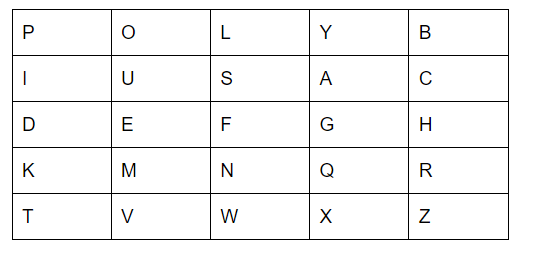

4- used the numbers above to get the decipher text which is: "Thank You For Saving Me The Flag Is Moscow"